In [ ]:
# CNN Convolutional Neural Network 卷积神经网络


## 图像操作基础

通道

一个图片是由颜色、像素点、像素点深浅度构成
，每一个像素都有深浅度，可以用数值表达例如[2]
像素点在二维空间上的位置就注册了矩阵。但此时图像还是一个黑白图像（灰度图）。
而色彩是由三色（红黄蓝）构成，每一个色彩作为一个颜色层，每一个颜色层具有像素点与像素深浅度（数值）
三色图叠加在一起就组成了彩色图片。

---

参考

* [深度学习NCHW和NHWC数据格式（由三维数据转换成一维数据的遍历方式）](https://dontla.blog.csdn.net/article/details/123141775?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&utm_relevant_index=2)
* [https://blog.csdn.net/m0_37673307/article/details/81271155](https://blog.csdn.net/m0_37673307/article/details/81271155)

---

### 图像的基本处理
> 基于Opencv包，




In [9]:
!pip install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 38.2/38.2 MB 1.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 38.2/38.2 MB 2.6 MB/s eta 0:00:00


### opencv的基本操作

OpenCV的全称是Open Source Computer Vision Library，是一个跨平台的电脑视觉库。OpenCV是由英特尔公司发起并参与开发，以BSD许可证授权发行，可以在商业和研究领域中免费使用。OpenCV可用于开发实时的图像处理、电脑视觉以及模式识别程序。该程序库也可以使用英特尔公司的IPP进行加速处理。

figs\batch norm4.jp

---

1. 图形的灰度、彩色读取

openCV默认采用BGR（蓝绿红）格式，而matplotlib等多采用RGB格式，故需要转换

```python
    img_rgb=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)

```

2. 图片的保存

图片读取、转换后格式保存本地后转换格式保留。例如灰度读取，保存后将变为灰度

灰度图读取，显示：


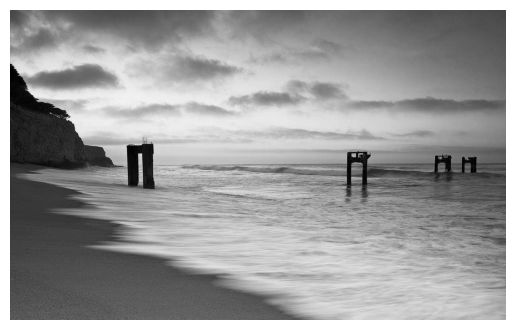

转换RGB后再显示：


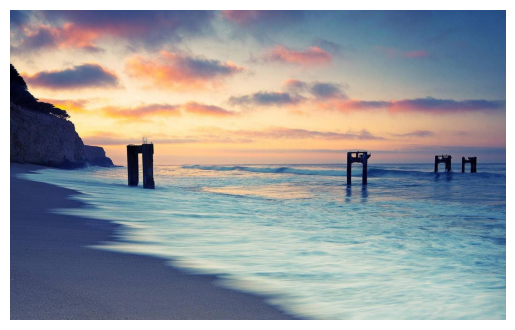

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    cv2.__version__
    file='pics/bridge.jpg'
    img_gray=cv2.imread(file,cv2.IMREAD_GRAYSCALE)#读取为灰度图
    plt.imshow(img_gray,cmap="gray")#plt中通过cmp制定显示的是灰度,否则显示出错
    plt.axis("off")
    print("灰度图读取，显示：")
    plt.show()
    ################################################################
    img_color =cv2.imread(file,cv2.IMREAD_COLOR)

    plt.imshow(img_color )
    print("转换RGB后再显示：")
    img_rgb=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img_rgb)
    cv2.imwrite("pics/img_gray.jpg",img_gray)

图片与numpy的转换

图片能被机器学习算法所处理，最基本的步骤就是处理成计算机所能读写的格式，最基本通用的格式即numpy数组。

可以通过cv2对图像进行大小，规范、提升批处理图像。包括

1. 改变图像大小（调整像素）
调整图像时图像处理的常见任务。在数据分析中，原始图像形状大小不同，但被机器学习时往往必须有相同大小（像素数）。

但图像大小的标准化也会带来一些信息上的损失，由于图像时包含信息的矩阵，当减少图像像素后，矩阵大小也会缩小，信息量也会变小。

同时图像改变也可以减轻机器学习时内存的压力。

机器学习中常见图像规格包括：$32 \times 32, 64 \times 64, 96 \times 96, 256 \times 256$

可以通过numpy.flatten()将二维的灰度图摊平，从而进行计算，例如在之前深度学习中载入全连接层时，为了使得输入为二维矩阵（bitch，img）形式，img就是摊平图像形成的向量

2. 色彩通道设置
> 色彩通道时cnn重点概念

彩色图像的像素不是用一个值（例如25*25）表示，而是用多个值（常用3个），分别表示每个通道（红，绿，蓝等）的强度，这些色彩分量混合后可以

表示对应像素点的颜色。例如彩色32*32图所有的特征值（为3*32*32=3072）

3. 多通道颜色
[使用python opencv 对图像通道的基本操作](https://blog.csdn.net/m0_56497861/article/details/116422179)

Split()函数可以拆分图像的通道，例如BGR图像的三个通道，一般常见调用格式如下：
```python
b,g,r=cv2.split(img)
```
其中：

     b,g,r分别是B通道、G通道、R通道的图像信息。

     img是要拆分的图像。
同时通过merge还可以将不同通道色彩合并。
```python
Imagebgr=cv2.merge([b,g,r])
```

灰度图的图像类型为:<class 'numpy.ndarray'>，格式为：(32, 32)
彩色图的图像类型为:<class 'numpy.ndarray'>，格式为：(32, 32, 3)，格式为
摊平32*32灰度图,摊平后的向量形状为：{} (1024,)
转化为矩阵形状: (1, 1024)
32*32彩色图片所有值的数量： 3072
B 通道shape：(1050, 700)；R 通道shape:(1050, 700);G 通道shape:(1050, 700)


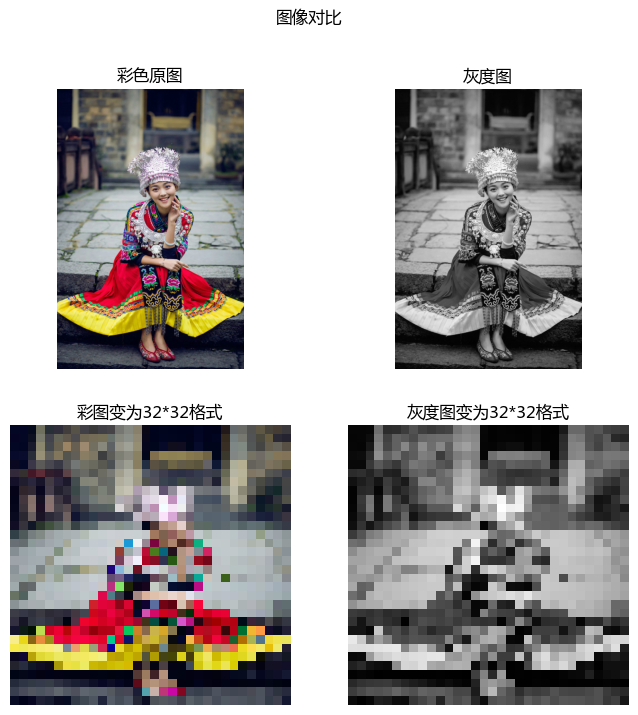

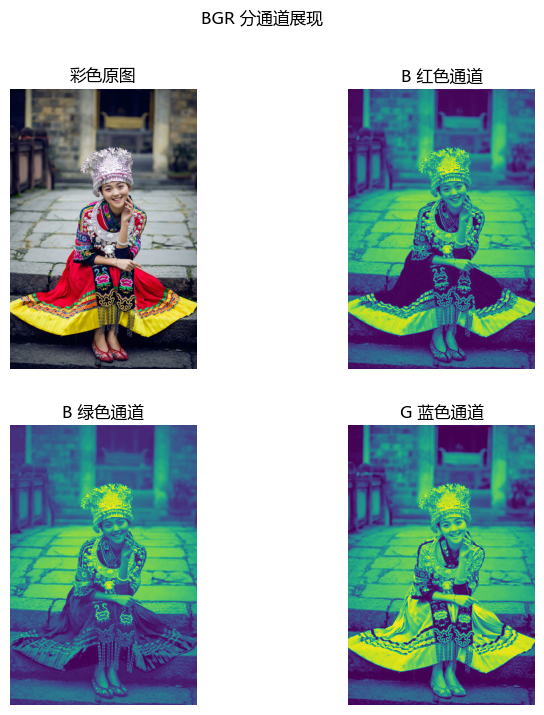

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os

if __name__ == '__main__':
    ########################彩图、灰度图变为32*32格式########################################
    file='pics/girl.jpg'
    
    img_c=cv2.imread(file,cv2.IMREAD_COLOR)
    img_rgb=cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)
    img_32_c=cv2.resize(img_rgb,(32,32))
 
    img_gray=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    img_32=cv2.resize(img_gray,(32,32))
 
    #############################图像展现###################################
    myfont=FontProperties(fname=r"pics/微软雅黑.ttf",size=12)
    #创建figure对象以及对象包含的多个子图
    fig2,axes2=plt.subplots(2,2)
    fig2.set_size_inches(8,8)
    fig2.suptitle("图像对比",fontproperties=myfont)

    ax1=axes2[0,0]
    ax1.axis("off")
    ax1.set_title("彩色原图",fontproperties=myfont)# 给第一个图副值titile
    ax1.imshow(img_rgb)

    ax2=axes2[1,0]
    ax2.axis("off")
    ax2.set_title("彩图变为32*32格式",fontproperties=myfont)
    ax2.imshow(img_32_c)
    
    ax3=axes2[0,1]
    ax3.axis("off")
    ax3.set_title("灰度图",fontproperties=myfont)
    ax3.imshow(img_gray,cmap='gray')

    ax4=axes2[1,1]
    ax4.axis("off")
    ax4.set_title("灰度图变为32*32格式",fontproperties=myfont)
    ax4.imshow(img_32,cmap='gray')

    #############################图像格式###################################
    print("灰度图的图像类型为:{}，格式为：{}".format(type(img_32),img_32.shape))
    print("彩色图的图像类型为:{}，格式为：{}，格式为".format(type(img_32_c),img_32_c.shape))
    print("摊平32*32灰度图,摊平后的向量形状为：{}",img_32.flatten().shape)
    print("转化为矩阵形状:",img_32.flatten().reshape(1,-1).shape)
    print("32*32彩色图片所有值的数量：",len(img_32_c.flatten()))
    ##############################多通道彩图##################################
    img_b,img_r,img_g=cv2.split(img_c)#拆分不同通道子图像
    fig3,axes3=plt.subplots(2,2)
    fig3.set_size_inches(8,8)
    fig3.suptitle("BGR 分通道展现",fontproperties=myfont)

    ax1=axes3[0,0]
    ax1.axis("off")
    ax1.set_title("彩色原图",fontproperties=myfont)# 给第一个图副值titile
    ax1.imshow(img_rgb)

    ax2=axes3[1,0]
    ax2.axis("off")
    ax2.set_title("B 绿色通道",fontproperties=myfont)
    ax2.imshow(img_b)
    
    ax3=axes3[0,1]
    ax3.axis("off")
    ax3.set_title("B 红色通道",fontproperties=myfont)
    ax3.imshow( img_r)

    ax4=axes3[1,1]
    ax4.axis("off")
    ax4.set_title("G 蓝色通道",fontproperties=myfont)
    ax4.imshow(img_g)
    
    print("B 通道shape：{}；R 通道shape:{};G 通道shape:{}".format(img_b.shape,img_r.shape,img_g.shape))
    

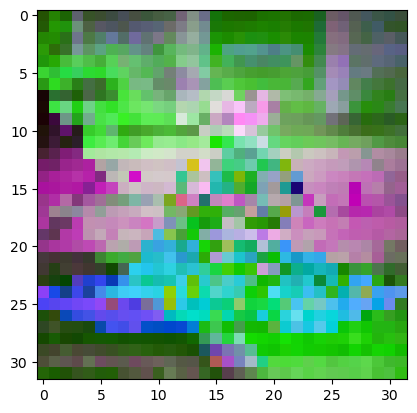

In [47]:
 
################################################################
file='pics/bridge.jpg'
img_color1 =cv2.imread(file,cv2.IMREAD_COLOR)
img_rgb1=cv2.cvtColor(img_color1,cv2.COLOR_BGR2RGB)
img_color1=cv2.resize(img_color1,(32,32))
img1_b,img1_r,img1_g=cv2.split(img_color1)#拆分不同通道子图像
################################################################
file='pics/girl.jpg'
img_color2 =cv2.imread(file,cv2.IMREAD_COLOR)
img_rgb2=cv2.cvtColor(img_color2,cv2.COLOR_BGR2RGB)
img_color2=cv2.resize(img_color2,(32,32))
img2_b,img2_r,img2_g=cv2.split(img_color2)#拆分不同通道子图像  
#######不同图片通道合并############################
img=cv2.merge([img2_b,img1_r,img2_g])
plt.imshow(img) 

# 背景知识 关于数据形状的再认识

总结之前深度学习知识，可以认为深度学习由以下几个知识模块构成：

1. 梯度下降
基于微积分知识，找到关于权参$W$的误差函数$L$的最小更新方向（梯度向量方向$\nabla w$）
2. 正向传播 forward
深度学习网络由多层构成，简单的可以分为全连接层，其实现了输入数据向量与该层权参内积，作为下一层激活层的输入，并通过激活函数计算得到激活值$A=Activate(X \dot W +B)$

最终到达损失函数层，通过损失函数，对比真值与预测值的差距loss，这一个过程称为正向传播

2. 反向传播与梯度下降 backward

正向传播后，得到$loss$。神经网络拟合的最终目标就是将$loss$降到最小，使得由权参、偏参所构成的深度网络函数$D$能够最好的拟合真实数据，并进行预测。



结合线性代数，numpy，张量知识，总结各种不同数据形状

基本概念
线性代数中，维度代表的是一个向量中特征值的多少，例如
[1,2,3,4,5]是一个向量，有5个特征值构成，维度为5，不能向量的维度多大，都表示的是空间（二维、三维、多维度）的一个点坐标，以及从原点导该点的有方向，大小（norm模）的线段。而不是一个空间。
多个（维度一致）向量就可以组成一个矩阵，而矩阵实际上可以形成空间，
例如 [[2,1],[2,3]]就构成了一个2维空间，[[0,0,1],[1,0,0],[1,0,1]]构成了3维空间，但是构成空间的向量必须线性无关。
在数据分析中，多使用矩阵来表达一组数据量，矩阵中每一个构成的向量代表一个样本。矩阵的每一列代表一个属性。

阶，在深度学习张量概念中，也有维度，但此时维度指的是，

pytorch与tensorflow等深度学习框架中，使用的是tensor（张量）概念。

张量是一种数据结构，可以认为是一种高维数组。结合线性代数，所对照的张量

* 标量——0阶张量
* 向量——1阶张量
* 矩阵——2阶张量
* 多维向量组——多阶张量



1. 一元、多元函数对应的输入数据就是一个矩阵，而目标数据target是一个向量
2. 图片，不论是否彩色，都是3阶

[图解卷积神经网络（CNN）](https://zhuanlan.zhihu.com/p/117573015)

## 基本概念

CNN 从基本概念来说说